In [717]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [718]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/SpaceshipTitanic_TrainData.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/SpaceshipTitanic_TestData.csv")
sub_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/sample_submission.csv")

In [719]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [720]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [721]:
data[['CabinDeck','CabinNum','CabinSide']] = data.Cabin.str.split("/", expand=True)
data[['PassengerGroup','PassengerNum']] = data.PassengerId.str.split("_", expand=True)

In [722]:
data. drop(["Cabin","PassengerId","Name"], axis=1, inplace=True)

In [723]:
data.isnull().sum()

HomePlanet        201
CryoSleep         217
Destination       182
Age               179
VIP               203
RoomService       181
FoodCourt         183
ShoppingMall      208
Spa               183
VRDeck            188
Transported         0
CabinDeck         199
CabinNum          199
CabinSide         199
PassengerGroup      0
PassengerNum        0
dtype: int64

In [724]:
data['HomePlanet'] = data['HomePlanet'].map({'Earth':1, 'Europa':2, 'Mars':3}).astype('float64')
data['Destination'] = data['Destination'].map({'TRAPPIST-1e':1, '55 Cancri e':2, 'PSO J318.5-22':3}).astype('float64')
data['CabinDeck'] = data['CabinDeck'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}).astype('float64')
data['CabinSide'] = data['CabinSide'].map({'S':1, 'P':2}).astype('float64')
data['PassengerNum'] = data['PassengerNum'].astype('float64')
data['PassengerGroup'] = data['PassengerGroup'].astype('float64')
data['CabinNum'] = data['CabinNum'].astype('float64')

In [725]:
data['VIP'].replace({True:1.0, False:0.0},inplace=True)
data['CryoSleep'].replace({True:1.0, False:0.0},inplace=True)
data['Transported'].replace({True:1.0, False:0.0},inplace=True)
data['CabinNum'].replace({True:1.0, False:0.0},inplace=True)

In [726]:
data['RoomService'].fillna(value = data['RoomService'].mean(), inplace=True)
data['FoodCourt'].fillna(value = data['FoodCourt'].mean(), inplace=True)
data['ShoppingMall'].fillna(value = data['ShoppingMall'].mean(), inplace=True)
data['Spa'].fillna(value = data['Spa'].mean(), inplace=True)
data['VRDeck'].fillna(value = data['VRDeck'].mean(), inplace=True)
data['Age'].fillna(value = data['Age'].mean(), inplace=True)

In [727]:
data['HomePlanet'].fillna(value = 1.0, inplace=True)
data['CabinDeck'].fillna(value = 6.0, inplace=True)
data['CabinNum'].fillna(value = 82, inplace=True)
data['CabinSide'].fillna(value = 2.0, inplace=True)
data['Destination'].fillna(value = 1.0, inplace=True)
data['VIP'].fillna(value = 0.0, inplace=True)
data['CryoSleep'].fillna(value = 0.0, inplace=True)

In [728]:
data['CryoSleep'].value_counts(dropna=False)

0.0    5656
1.0    3037
Name: CryoSleep, dtype: int64

In [729]:
#data = pd.get_dummies(data, columns = ['VIP', 'CryoSleep'])
#data['VIP'].fillna(value = True, inplace=True)
#data['CryoSleep'].fillna(value = False, inplace=True)

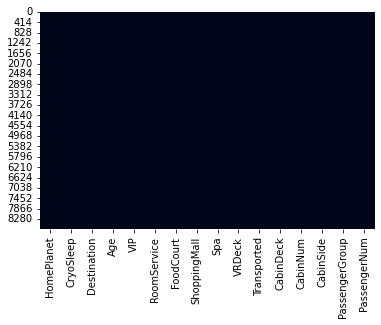

In [730]:
sb.heatmap(data.isnull(), cbar = False)

In [731]:
targetOutput = data['Transported']

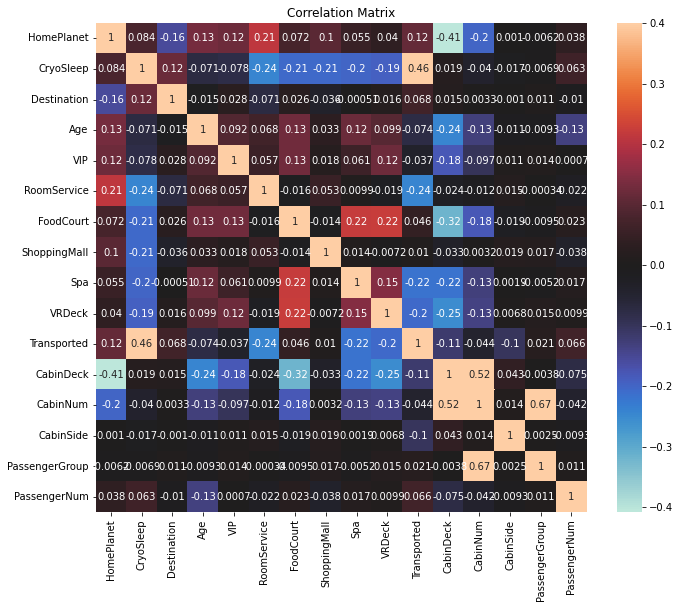

In [732]:
corr = data.corr()
plt.subplots(figsize=(11, 9))
sb.heatmap(corr ,annot = True, vmax=.4, center=0).set_title('Correlation Matrix');

In [733]:
data. drop(["Transported"], axis=1, inplace=True)

In [734]:
X_train, X_test, y_train, y_test = train_test_split(data, targetOutput, train_size = 0.8, test_size = 0.2, random_state = 0);

In [735]:
lr = LogisticRegression(solver='newton-cg' ,max_iter=400)

In [736]:
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.7791834387579069


**Now Processing the Test Data .........................**

In [737]:
test_data[['CabinDeck','CabinNum','CabinSide']] = test_data.Cabin.str.split("/", expand=True)
test_data[['PassengerGroup','PassengerNum']] = test_data.PassengerId.str.split("_", expand=True)

In [738]:
test_data.drop(["Cabin","PassengerId","Name"], axis=1, inplace=True)

In [739]:
test_data['HomePlanet'] = test_data['HomePlanet'].map({'Earth':1, 'Europa':2, 'Mars':3}).astype('float64')
test_data['Destination'] = test_data['Destination'].map({'TRAPPIST-1e':1, '55 Cancri e':2, 'PSO J318.5-22':3}).astype('float64')
test_data['CabinDeck'] = test_data['CabinDeck'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}).astype('float64')
test_data['CabinSide'] = test_data['CabinSide'].map({'S':1, 'P':2}).astype('float64')
test_data['PassengerNum'] = test_data['PassengerNum'].astype('float64')
test_data['PassengerGroup'] = test_data['PassengerGroup'].astype('float64')
test_data['CabinNum'] = test_data['CabinNum'].astype('float64')

In [740]:
test_data['VIP'].replace({True:1.0, False:0.0},inplace=True)
test_data['CryoSleep'].replace({True:1.0, False:0.0},inplace=True)
test_data['CabinNum'].replace({True:1.0, False:0.0},inplace=True)

In [741]:
test_data['RoomService'].fillna(value = test_data['RoomService'].mean(), inplace=True)
test_data['FoodCourt'].fillna(value = test_data['FoodCourt'].mean(), inplace=True)
test_data['ShoppingMall'].fillna(value = test_data['ShoppingMall'].mean(), inplace=True)
test_data['Spa'].fillna(value = test_data['Spa'].mean(), inplace=True)
test_data['VRDeck'].fillna(value = test_data['VRDeck'].mean(), inplace=True)
test_data['Age'].fillna(value = test_data['Age'].mean(), inplace=True)

In [742]:
test_data['HomePlanet'].fillna(value = 1.0, inplace=True)
test_data['CabinDeck'].fillna(value = 6.0, inplace=True)
test_data['CabinNum'].fillna(value = 82, inplace=True)
test_data['CabinSide'].fillna(value = 2.0, inplace=True)
test_data['Destination'].fillna(value = 1.0, inplace=True)
test_data['VIP'].fillna(value = 0.0, inplace=True)
test_data['CryoSleep'].fillna(value = 0.0, inplace=True)

In [743]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomePlanet      4277 non-null   float64
 1   CryoSleep       4277 non-null   float64
 2   Destination     4277 non-null   float64
 3   Age             4277 non-null   float64
 4   VIP             4277 non-null   float64
 5   RoomService     4277 non-null   float64
 6   FoodCourt       4277 non-null   float64
 7   ShoppingMall    4277 non-null   float64
 8   Spa             4277 non-null   float64
 9   VRDeck          4277 non-null   float64
 10  CabinDeck       4277 non-null   float64
 11  CabinNum        4277 non-null   float64
 12  CabinSide       4277 non-null   float64
 13  PassengerGroup  4277 non-null   float64
 14  PassengerNum    4277 non-null   float64
dtypes: float64(15)
memory usage: 501.3 KB


In [744]:
test_targetOutput = lr.predict(test_data)

Text(0.5, 1.0, 'Prediction distribution')

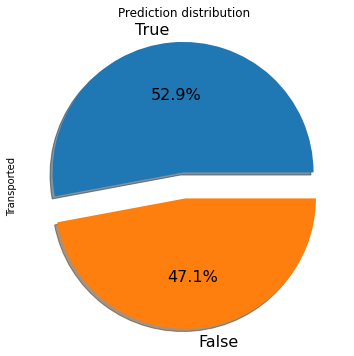

In [745]:
sub_data['Transported']= test_targetOutput

# Replace 0 to False and 1 to True
sub_data = sub_data.replace({0:False, 1:True})

# Prediction distribution
plt.figure(figsize=(6,6))
sub_data['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [747]:
sub_data.to_csv("/content/drive/MyDrive/Colab Notebooks/submission_file.csv", index=False)